In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

dataset = pd.read_csv('./data_input/npl_train.csv').drop('X', axis=1)

In [2]:
dataset.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


# Manually Generate Corrupted Features

In [3]:
dataset['sisa_tagihan_per_jumlah_kartu'] = dataset['sisa_tagihan_tidak_terbayar']/dataset['jumlah_kartu']
dataset['sisa_tagihan_per_limit'] = dataset['sisa_tagihan_tidak_terbayar']/dataset['limit_kredit']
dataset['total_pemakaian'] = dataset['total_pemakaian_tunai']+dataset['total_pemakaian_retail']
dataset['total_pemakaian_per_limit'] = dataset['total_pemakaian']/dataset['limit_kredit']

In [4]:
dataset.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


# Data Scaling

In [5]:
import warnings; warnings.filterwarnings('ignore') # Just ignore user warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as mtfm
import matplotlib.gridspec as grids
import seaborn as sns
pd.options.display.max_columns = None

def boxploting(dataset, feature_to_plot, titles='Boxplot', colorb='b'):
    plt.figure(figsize=(20,15))
    gs = grids.GridSpec(4,3)
    for i, feature in enumerate(feature_to_plot):
        ax = plt.subplot(gs[i])
        sns.boxplot(y=feature, data=dataset, color=colorb)
        plt.title(feature,size=15)
        ax.set_ylabel(' ')
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.suptitle(titles,size=20)

def distploting(dataset,feature_to_plot,titles="Dataset Distribution",
                logx=False,featlog=[],colorhist="y",colorline="k"):
    if len(feature_to_plot)==2:
        gs = grids.GridSpec(1,2)
        plt.figure(figsize=(25,10))
    else:
        plt.figure(figsize=(25,20))
        gs = grids.GridSpec(3,3)   
    for i, feature in enumerate(feature_to_plot):
        ax = plt.subplot(gs[i])
        sns.distplot(dataset[feature], color=colorhist,
              kde_kws={"color": colorline,
                       "lw": 3,
                       "label": "KDE"})
        if logx==True:
            if feature in featlog:
                ax.set_xlabel('log('+str(feature)+')', size=20)
            else:
                ax.set_xlabel(xlabel=feature, size=20)
        else:
            ax.set_xlabel(xlabel=feature, size=20)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.legend(prop = mtfm.FontProperties(size=15))
        plt.suptitle(titles,size=25)

def MathScaling(dataset, feature_to_log, scaler_type = 'log'):
    data_to_scale = dataset.copy()
    if scaler_type=='log':
        for feature in feature_to_log:
            data_to_scale[feature] = np.log(data_to_scale[feature]+1)
    elif scaler_type=='sqrt':
        for feature in feature_to_log:
            data_to_scale[feature] = np.sqrt(data_to_scale[feature])
    elif scaler_type=='sigmoid':
        for feature in feature_to_log:
            data_to_scale[feature] = 1/(1+np.exp(-1*data_to_scale[feature]))        
    return data_to_scale

def DataScaling(dataset, feature_to_scale, scaler_type='minmax'):
    data = dataset.copy()
    if scaler_type=='minmax':
        Scaler = MinMaxScaler()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    elif scaler_type=='standard':
        Scaler = StandardScaler()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)        
    elif scaler_type=='robust':
        Scaler = RobustScaler()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    elif scaler_type=='power':
        Scaler = PowerTransformer()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    return data

def DataWhitening(dataset, feature_to_whitening):
    data = dataset.copy().dropna()
    data[feature_to_whitening] = PCA().fit_transform(data[feature_to_whitening])
    return data

In [6]:
dataset_scale = dataset.copy()
FEATURES_TO_SCALE = ['outstanding','limit_kredit','tagihan','total_pemakaian_tunai',
                    'sisa_tagihan_tidak_terbayar','persentasi_overlimit','jumlah_tahun_sejak_pembukaan_kredit',
                    'sisa_tagihan_per_jumlah_kartu','sisa_tagihan_per_limit']
FEATURES_TO_SCALE2 = ['total_pemakaian_retail','rasio_pembayaran','rasio_pembayaran_3bulan',
                     'rasio_pembayaran_6bulan','total_pemakaian','total_pemakaian_per_limit']
FEATURES_TO_DROP = ['kode_cabang', 'tagihan',
                   'sisa_tagihan_per_limit', 'sisa_tagihan_per_jumlah_kartu',
                   'skor_delikuensi', 'jumlah_kartu']

dataset_scale = MathScaling(dataset_scale, FEATURES_TO_SCALE, scaler_type = 'log')
dataset_scale = DataScaling(dataset_scale, FEATURES_TO_SCALE, scaler_type='power')
# dataset_scale = DataWhitening(dataset_scale, FEATURE_TO_SCALE)

dataset_scale = MathScaling(dataset_scale, FEATURES_TO_SCALE2, scaler_type = 'sigmoid')
dataset_scale = DataScaling(dataset_scale, FEATURES_TO_SCALE2, scaler_type='power')
# dataset_scale = DataWhitening(dataset_scale, FEATURE_TO_SCALE2)

dataset_scale = dataset_scale.drop(FEATURES_TO_DROP, axis=1)
columns = dataset_scale.columns

# Standardize data
scaler = StandardScaler().fit(dataset_scale)
dataset_scale = scaler.transform(dataset_scale)
dataset_scale = pd.DataFrame(dataset_scale, columns=columns)
dataset_scale['flag_kredit_macet'] = dataset['flag_kredit_macet']

/anaconda3/envs/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [7]:
dataset_scale.to_csv('data_input/data_train_preprocessed.csv')

# Distributions After Preprocessing

In [8]:
#distploting(dataset_scale,FEATURES_TO_SCALE,titles="Dataset Distribution")

In [9]:
#distploting(dataset_scale,FEATURES_TO_SCALE2,titles="Dataset Distribution")

In [10]:
dataset_scale.head()

,outstanding,limit_kredit,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,-2.254507,-0.341910,-0.222688,0.715835,-0.010147,0.670874,-0.596033,0.220879,0.248936,0,1.560103,0.694332,-0.736672,-0.809728,-0.673751,-1.354345,-1.183731
1,-1.511748,0.052815,-0.222688,0.715835,-1.497271,-1.494503,-0.596033,-4.959622,-4.134358,0,-2.028521,0.694332,-0.735567,-0.870662,-0.738682,-1.376186,-1.233806
2,0.246799,0.956679,-0.222688,-1.394860,-1.497271,0.670874,-0.596033,0.220879,0.248936,0,0.995881,-1.438661,-0.736841,-0.659983,-0.564763,-0.781019,-0.614953
3,-0.176158,0.734525,-0.222688,0.715835,0.394421,0.670874,-0.596033,0.220879,0.248936,0,1.959948,0.694332,0.475410,-0.579635,-0.677246,-1.139048,-0.432730
4,0.470197,0.052815,-0.222688,0.715835,0.691364,0.670874,-0.596033,0.220879,0.248936,0,-1.392964,0.694332,1.351273,0.808964,-0.260482,0.332018,-0.456006


# Scatter Matrix

In [11]:
def plot_scatter_matrix(dataframe, columns, colors):
    plt.figure()
    axs = pd.scatter_matrix(dataframe[columns], figsize=(20,20), c=colors)
    n = len(columns)
    for x in range(n):
        for y in range(n):
            # to get the axis of subplots
            ax = axs[x, y]
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = 80
    plt.show()

<Figure size 432x288 with 0 Axes>

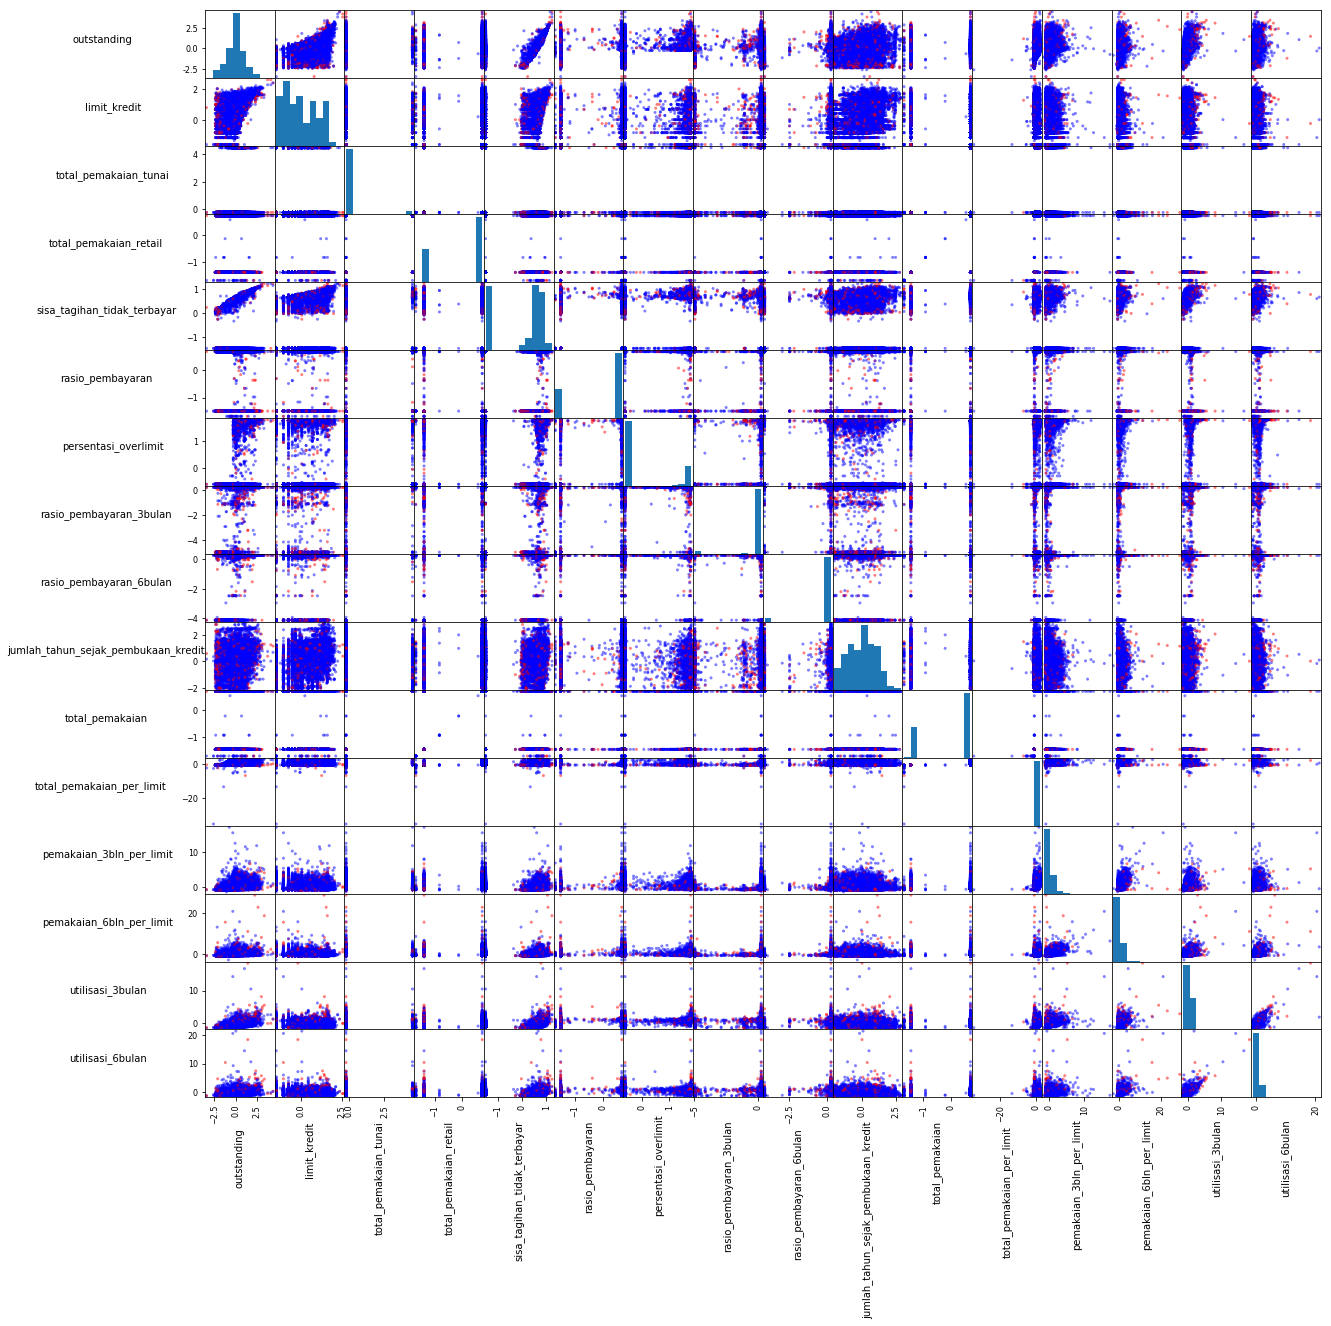

In [12]:
FEATURES_TO_PLOT = ['jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']
FEATURES_TO_PLOT = [item for item in FEATURES_TO_PLOT if item not in FEATURES_TO_DROP]

colors = ['r' if x>0 else 'b' for x in dataset_scale["flag_kredit_macet"]]
plot_scatter_matrix(dataset_scale, columns=FEATURES_TO_PLOT, colors=colors)

# PCA

In [16]:
from sklearn.decomposition import PCA

def plot_pca(dataframe, colors=None, scree_plot=True, loading_plot=False):
    '''
    TODO : complete the loading plot
    '''
    pca = PCA(n_components=len(dataframe.columns))
    principal_components = pca.fit_transform(dataframe)
 
    plt.figure(figsize=(12,12))
    plt.scatter(principal_components[:,0], principal_components[:,1], c=colors, marker='.', alpha=0.1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA')
    plt.show()
    
    if scree_plot:
        var= pca.explained_variance_ratio_*100 #The amount of variance that each PC explains
        cum_var=np.cumsum(pca.explained_variance_ratio_)*100 #Cumulative Variance explains
        
        # Plot explained variance
        plt.figure(figsize=(12,6))
        plt.bar(range(len(dataframe.columns)), var, fill=False)
        plt.plot(var, color='blue', label='per component')
        plt.scatter(range(len(dataframe.columns)), var, color='blue')
        for i, value in enumerate(var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')
        
        # Plot cummulative explained variance
        plt.plot(cum_var, color='orange', label='cumulative')
        plt.scatter(range(len(dataframe.columns)), cum_var, color='orange')
        for i, value in enumerate(cum_var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')

        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance (%)')
        plt.title('Scree Plot')
        plt.legend()
        plt.show()
    
    if loading_plot:
        pass

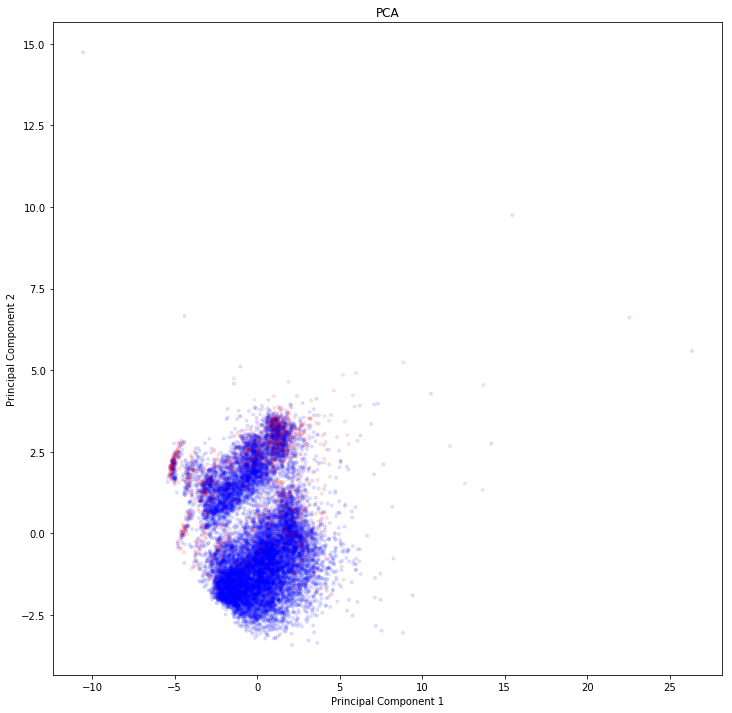

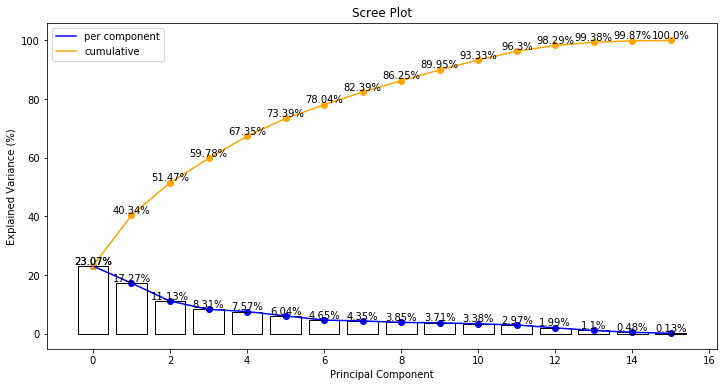

In [17]:
dataset_dimreduction = dataset_scale.drop(['flag_kredit_macet'], axis=1)
colors = ['r' if x>0 else 'b' for x in dataset_scale["flag_kredit_macet"]]
plot_pca(dataset_dimreduction, colors=colors)

# UMAP

### Global structure (n_neighbors=15)

In [15]:
import umap
reducer = umap.UMAP(init="random", n_neighbors=15)
embedding = reducer.fit_transform(dataset_dimreduction)

KeyboardInterrupt: Failed in nopython mode pipeline (step: nopython mode backend)


In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(embedding[:,0], embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()

### Local structure (n_neighbors=5)

In [ ]:
import umap
reducer = umap.UMAP(init="random", n_neighbors=5)
embedding = reducer.fit_transform(dataset_dimreduction)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(embedding[:,0], embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()

# T-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=300, n_iter=5000)
tsne_embedding = tsne.fit_transform(dataset_dimreduction)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(tsne_embedding[:,0], tsne_embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()